In [1]:
import scipy.ndimage
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

(800, 800, 3)


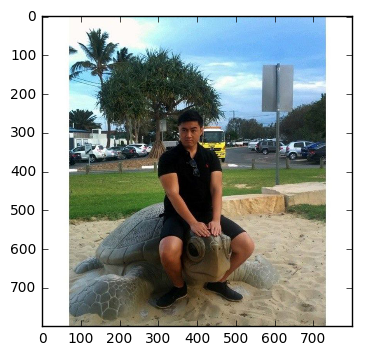

In [9]:
arr = scipy.ndimage.imread("human/photo_has_human/10253752_10154060094745447_7893821423180464707_n.jpg", mode="RGB")
print(arr.shape)
plt.imshow(arr)

In [45]:
def cut_array(arr, box, step):
    up_left = [0, 0]
    while up_left[0] < arr.shape[0]:
        while up_left[1] < arr.shape[1]:
            bottom_right = [up_left[0] + box[0], up_left[1] + box[1]]
            crop = arr[up_left[0]:bottom_right[0], up_left[1]:bottom_right[1]]
            # pad
            if len(arr.shape) < 3:
                padding = [[0, box[0] - crop.shape[0]], [0, box[1] - crop.shape[1]]]
            else:
                padding = [[0, box[0] - crop.shape[0]], [0, box[1] - crop.shape[1]], [0, 0]]
            yield np.pad(crop,
                         padding,
                         'constant')
            
            if bottom_right[1] >= arr.shape[1]: break
            up_left[1] += step[1]
            
        if bottom_right[0] >= arr.shape[0]: break
        up_left[0] += step[0]
        up_left[1] = 0

(600, 600, 3)
(600, 600, 3)


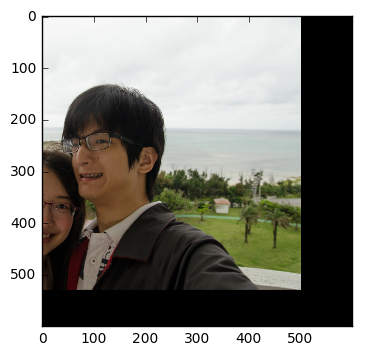

In [50]:
arr = scipy.ndimage.imread("human/photo_has_human/_DSC6423.jpg", mode="RGB")
test_cnt = 0
for a in cut_array(arr, [600, 600], [300, 300]):
    print(a.shape)
    scipy.misc.imsave("human/test_crop{}.jpg".format(test_cnt), a)
    test_cnt += 1
    plt.imshow(a)

In [52]:
cnt = 0

In [54]:
for img_file in glob.glob("human/photo_no_humam/*"):
    print(img_file)
    img_arr = scipy.ndimage.imread(img_file, mode="RGB")
    for a in cut_array(img_arr, [400, 400], [200, 200]):
        scipy.misc.imsave("human_f/crop{}.jpg".format(cnt), a)
        cnt += 1
        
for img_file in glob.glob("human/photo_has_human/*"):
    img_arr = scipy.ndimage.imread(img_file, mode="RGB")
    for a in cut_array(img_arr, [400, 400], [200, 200]):
        scipy.misc.imsave("human_t/crop{}.jpg".format(cnt), a)
        cnt += 1

human/photo_no_humam/_DSC0436.jpg
human/photo_no_humam/_DSC0439.jpg
human/photo_no_humam/_DSC0442.jpg
human/photo_no_humam/_DSC0450.jpg
human/photo_no_humam/_DSC0455.jpg
human/photo_no_humam/_DSC0477.jpg
human/photo_no_humam/_DSC0479.jpg
human/photo_no_humam/_DSC0486.jpg
human/photo_no_humam/_DSC0494.jpg
human/photo_no_humam/_DSC0500.jpg
human/photo_no_humam/_DSC0501.jpg
human/photo_no_humam/_DSC0505.jpg
human/photo_no_humam/_DSC0509.jpg
human/photo_no_humam/_DSC0511.jpg
human/photo_no_humam/_DSC0512.jpg
human/photo_no_humam/_DSC0524.jpg
human/photo_no_humam/_DSC0526.jpg
human/photo_no_humam/_DSC0558.jpg
human/photo_no_humam/_DSC0563.jpg
human/photo_no_humam/_DSC0575.jpg
human/photo_no_humam/_DSC0585.jpg
human/photo_no_humam/_DSC0590.jpg
human/photo_no_humam/_DSC0607.jpg
human/photo_no_humam/_DSC0619.jpg
human/photo_no_humam/_DSC0620.jpg
human/photo_no_humam/_DSC0627.jpg
human/photo_no_humam/_DSC0629.jpg
human/photo_no_humam/_DSC0634.jpg
human/photo_no_humam/_DSC0639.jpg
human/photo_no

## Then put photos with a face to face_t and photos without a face to face_f

In [56]:
imgs = []
labels = []
for img_file in glob.glob("human_t/*"):
    img_arr = scipy.ndimage.imread(img_file, mode="RGB")
    img_arr = scipy.misc.imresize(img_arr, [100, 100])
    imgs.append(img_arr)
    labels.append([1.0, 0.0])
    
for img_file in glob.glob("human_f/*"):
    img_arr = scipy.ndimage.imread(img_file, mode="RGB")
    img_arr = scipy.misc.imresize(img_arr, [100, 100])
    imgs.append(img_arr)
    labels.append([0.0, 1.0])
print(imgs[0].shape)

(100, 100, 3)


In [57]:
np.savez("human_with_label.npz",
         imgs=np.array(imgs),
         labels = np.array(labels, dtype=np.double))